In [161]:
import numpy as np
import pandas as pd

filename = 'titanicdata_cleanedv2.csv'
data = pd.read_csv(filename)

raw_data = data.values # converting from pandas dataframe to numpy array
attribute_names = np.asarray(data.columns) # extracting the attribute names
print("These are the features:",attribute_names) # prints the attribute names

These are the features: ['Survived' 'Pclass(1)' 'Pclass(2)' 'Pclass(3)' "Name('Mr')" "Name('Mrs')"
 "Name('Miss')" "Name('Master')" "Name('Other')" 'Sex' 'Age'
 'Siblings/Spouses Aboard' 'Parents/Children Aboard' 'Fare']


In [162]:
# data in X,y format - y vector containing attribute 'Survived'
X = np.delete(raw_data, 0, axis=1)
y = raw_data[:,0]

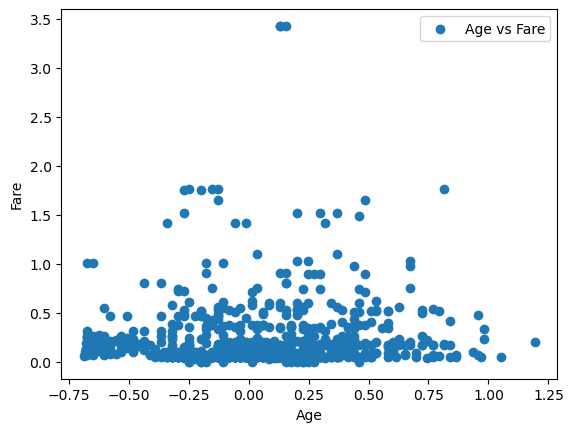

In [163]:
# in the fllowing the age is plotted against the price paid for tickets.
# There is very little correlation here, although it may appear, that middelaged people in generel paid a little bit more for their tickets
import matplotlib.pyplot as plt
A = X[:, 9]
B = X[:, 12]
plt.figure(1)
plt.scatter(A, B, label="Age vs Fare")
plt.xlabel(str(attribute_names[10]))
plt.ylabel(str(attribute_names[13]))
plt.legend()
plt.show()

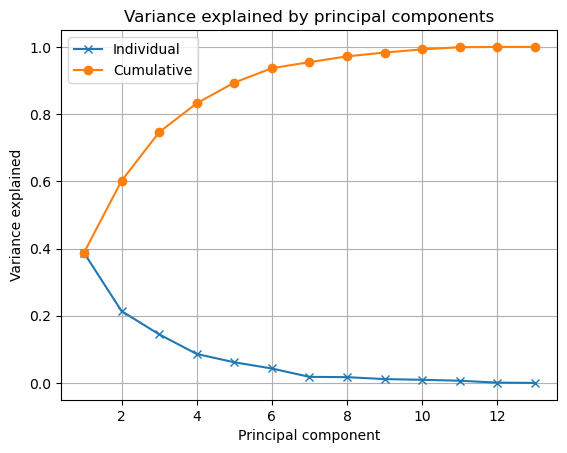

In [164]:
from scipy.linalg import svd

# PCA by computing SVD of Y
U,S,Vh = svd(X,full_matrices=False)
V = Vh.T    

rho = (S*S) / (S*S).sum() 

# plot of variance explained

plt.figure(2)
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative'])
plt.grid()
plt.show()

In [165]:
# How many pricipal comp for 85% explained
new_threshold = 0.85
sumit = 0
for i in range(len(rho)):
    sumit += rho[i]
    if sumit > new_threshold:
        print(str(i)+" principal comp for " +str(new_threshold)+ "% variance explained")
        break

4 principal comp for 0.85% variance explained


In [166]:
# Now we look at the first principal component to get a understanding about what features it captures
print("These are the features:",attribute_names[1:]), V[:,0]

These are the features: ['Pclass(1)' 'Pclass(2)' 'Pclass(3)' "Name('Mr')" "Name('Mrs')"
 "Name('Miss')" "Name('Master')" "Name('Other')" 'Sex' 'Age'
 'Siblings/Spouses Aboard' 'Parents/Children Aboard' 'Fare']


(None,
 array([-0.18699477, -0.13110058, -0.62165409, -0.59153589, -0.11206755,
        -0.19947055, -0.02756892, -0.00910653, -0.31582362,  0.01735398,
        -0.11607786, -0.08809313, -0.19237018]))

To get a large (negative) projection onto v1, we need a Pclass(3) male that is a 'Mr' \
This could very well be the features of a poor male aldult (adult hence 'Mr')

In [167]:
# Getting the full projection of the data
Z = X @ V

In [168]:
# The following cell divides the datapoints into different categories. Take a look below. This is used for the next plot."
classNames = ['male_mr_class3', 'male_master_class3', 'male_mr_class1', 'male_master_class1', 'female_mrs_class3', 'female_miss_class3', 'female_mrs_class1', 'female_miss_class1']
conditions = [
    (X[:, 8] == 0) & (X[:, 3] == 1) & (X[:, 2] == 1),
    (X[:, 8] == 0) & (X[:, 6] == 1) & (X[:, 2] == 1),
    (X[:, 8] == 0) & (X[:, 3] == 1) & (X[:, 0] == 1),
    (X[:, 8] == 0) & (X[:, 6] == 1) & (X[:, 0] == 1),
    (X[:, 8] == 1) & (X[:, 4] == 1) & (X[:, 2] == 1),
    (X[:, 8] == 1) & (X[:, 5] == 1) & (X[:, 2] == 1),
    (X[:, 8] == 1) & (X[:, 4] == 1) & (X[:, 0] == 1),
    (X[:, 8] == 1) & (X[:, 5] == 1) & (X[:, 0] == 1),
]
choices = [1, 2, 3, 4, 5, 6, 7, 8]

y = np.select(conditions, choices, default=0)


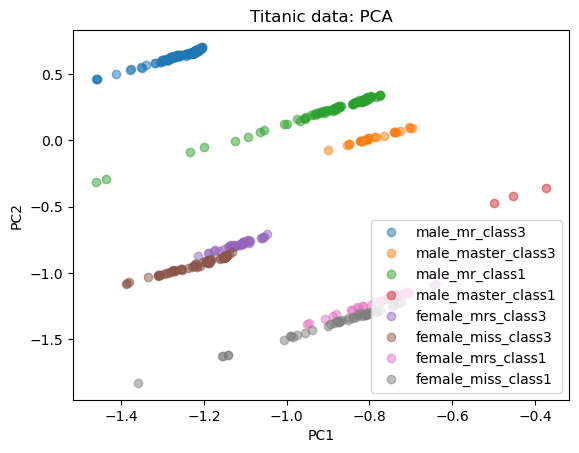

In [169]:
from matplotlib.pyplot import figure, plot, title, xlabel, ylabel, show, legend

# Plot PCA of the data
f = figure()
title('Titanic data: PCA')

for c in range(9):
    if c > 0:
        class_mask = y==c
        plot(Z[class_mask,0], Z[class_mask,1], 'o', alpha=.5)
legend(classNames, loc='lower right')
xlabel('PC{0}'.format(1))
ylabel('PC{0}'.format(2))

show()

In the above plot we see, that if we plot datapoints in the defined categories against the first and second PC - then data points from the same categories cluster together

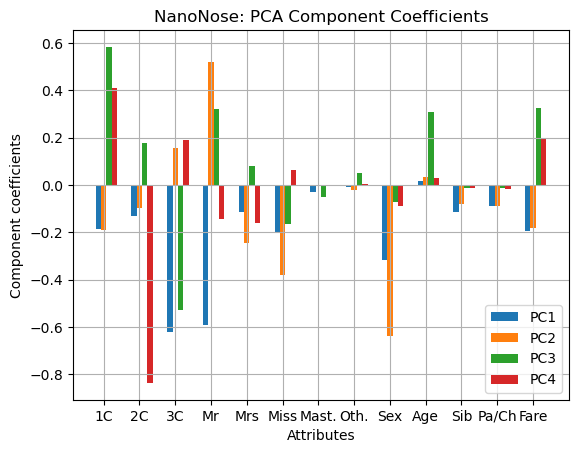

In [179]:
N,M = X.shape
# Interpret the principal directions

new_attributes = ['1C', '2C', '3C', 'Mr', 'Mrs', 'Miss', 'Mast.', 'Oth.', 'Sex', 'Age', 'Sib', 'Pa/Ch', 'Fare']

pcs = [0,1,2,3]
legendStrs = ['PC'+str(e+1) for e in pcs]
c = ['r','g','b']
bw = .15
r = np.arange(1,M+1)
for i in pcs:    
    plt.bar(r+i*bw, V[:,i], width=bw)
plt.xticks(r+bw, new_attributes)
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('NanoNose: PCA Component Coefficients')
plt.show()

The above plot shows us the coefficients for the first 4 PC's witch explain 85% of the variance. \
PC1 was descussed above \
To get a large projecton on PC2 we need a 'Mr' from 3. Class, that paid a low fare. At the same time a large (negative) projection is a 'Miss' or 'Mrs' from 1. Class that paid a large fare and have many children/familiy onboard. \
PC3 seems to capture old first class males \
PC4 seems to be class heavy - the class almost desides if we get a positive or negative projection

